In [1]:
#문제: SRSM을 구현하는 아래 매트랩 코드를 python 버전으로 포팅하고 아래 입력 이미지에대한 결과 맵을 디시플레이 해보세요.

In [ ]:
# clc;
# clear all;
# close all;
# pkg load image

# % Read image from file
# inImg = imread('defect36.png');
# figure(1); imshow(inImg)

# % Resize
# inImg2= conv2(inImg(:,:,2), ones(5, 5)/25.0, "same");
# inImg = imresize(inImg2, [128 128]);

# % Log Amplitude
# myFFT = fft2(inImg);
# myLogAmplitude = log(abs(fftshift(myFFT)).+1);

# % Get Phase
# myPhase = angle(myFFT);
# % get Residual of Spectral
# mySpectralResidual = myLogAmplitude - imfilter(myLogAmplitude, fspecial('average', 3), 'replicate');
# figure(2); imshow(mySpectralResidual)

# % get Saliency Map
# saliencyMap = abs(ifft2(exp(mySpectralResidual + i*myPhase))).^2;

# %% After Effect
# saliencyMap = mat2gray(imfilter(saliencyMap, fspecial('gaussian', [10, 10], 2.5)));
# figure(3);imshow(saliencyMap);

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
from scipy import signal, fftpack
import scipy

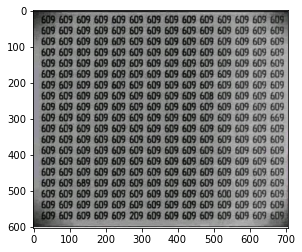

In [3]:
# % Read image from file
# inImg = imread('defect36.png');
# figure(1); imshow(inImg)

img = cv2.imread('/home/chohj/work/pre/0d4c7365-994c-464c-99e3-f516ed84fd1f.jpg')
color_ceonverted = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(color_ceonverted)



In [4]:
# % Resize
# inImg2= conv2(inImg(:,:,2), ones(5, 5)/25.0, "same");
# inImg = imresize(inImg2, [128 128]);
m = np.ones((5,5)) / 25

npimg = np.float64(color_ceonverted)
npimg[:,:,2]

inimg2 = signal.convolve2d(npimg[:,:,2], m, boundary='fill', mode='full')
inimg = cv2.resize(inimg2, dsize=(128,128))

In [5]:
# % Log Amplitude
# myFFT = fft2(inImg);
# myLogAmplitude = log(abs(fftshift(myFFT)).+1);

myFFT = np.fft.fft2(inimg)
myLogAmplitude = np.log(abs(np.fft.fftshift(myFFT))+1)

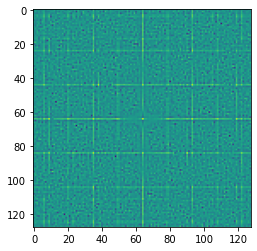

In [6]:
# % Get Phase
# myPhase = angle(myFFT);
# % get Residual of Spectral
# mySpectralResidual = myLogAmplitude - imfilter(myLogAmplitude, fspecial('average', 3), 'replicate');
# figure(2); imshow(mySpectralResidual)

myPhase = np.angle(myFFT)

#scipy.ndimage.convolve(x, f, mode='nearest')
mySpectralResidual = myLogAmplitude - scipy.ndimage.uniform_filter(myLogAmplitude, size=3, mode="nearest")

plt.imshow(mySpectralResidual)

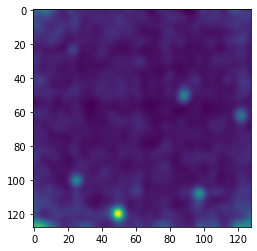

In [7]:
# % get Saliency Map
# saliencyMap = abs(ifft2(exp(mySpectralResidual + i*myPhase))).^2;

# %% After Effect
# saliencyMap = mat2gray(imfilter(saliencyMap, fspecial('gaussian', [10, 10], 2.5)));
# figure(3);imshow(saliencyMap);

saliencyMap = np.abs(fftpack.ifft2(np.exp(mySpectralResidual + 1j * myPhase))) ** 2

# After Effect
saliencyMap = scipy.ndimage.gaussian_filter(saliencyMap, sigma=2.5)
plt.imshow(saliencyMap)
plt.show()

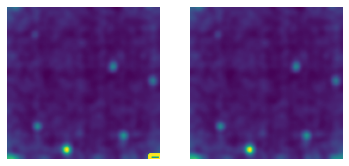

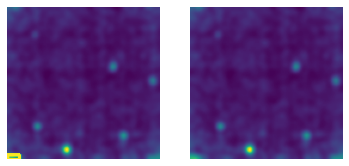

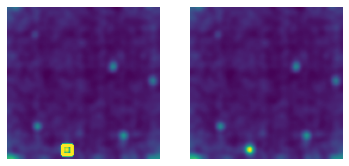

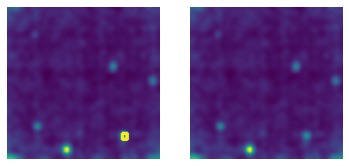

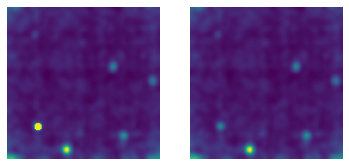

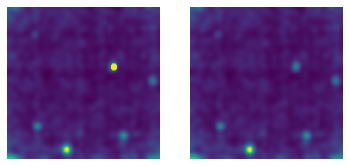

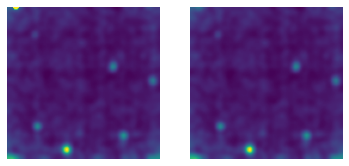

In [14]:
img = saliencyMap
min_val,max_val=img.min(),img.max()
img = 255.0*(img - min_val)/(max_val - min_val)
img = img.astype(np.uint8)

#img_trim = img[7:115,]

ret, thresh = cv2.threshold(img,100,255,0)

contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

for k, j in enumerate(contours):
    
    cnt = j

    img1 = img.copy().astype("uint8")
    img2 = img.copy().astype("uint8")

    # Straight Rectangle
    x, y, w, h = cv2.boundingRect(cnt)
    img1 = cv2.rectangle(img1, (x, y), (x+w, y+h), (255,255,0) ,2)

    # Rotated Rectangle
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = box.astype('int')
    img2 = cv2.drawContours(img2, [box], -1, 100) # blue

    #cv2.imwrite('/home/chohj/work/fst/srsm_img/' + img_name + '-' + str(k) + '.jpg' ,img1)

    plt.subplot(1,2,1)
    plt.imshow(img1)
    plt.axis('off')
    # plt.title("Straight Rectangle {0}-{1}".format(str(img_name),str(k)))
    plt.subplot(1,2,2)
    plt.imshow(img)
    plt.axis('off')
    # plt.title("Rotated Rectangle")
    plt.show()